# Regressão Polinomial

O objetivo deste exercício é se aprofundar nos conceitos de regressão e implementar os algoritmos de regressão polinomial.

Utilizaremos as mesmas bases de dados do exercício anterior:

In [1]:
import pandas as pd

dados_por = pd.read_csv('../../dataset/Portland_housePrices.csv', index_col=None)

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

Vamos examinar o comportamento do preço versus o tamanho do imóvel

Text(0, 0.5, 'Preço (USD$)')

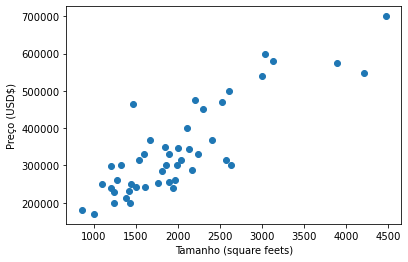

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.xlabel("Tamanho (square feets)")
plt.ylabel("Preço (USD$)")

## Medindo a falta de capacidade de generalização de modelos de alto grau

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Vamos agora encaixar uma regressão linear simples

In [36]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(X_train, y_train)

Vamos analizar o valor de $R^2$ na partição de treino e de teste

In [37]:
from sklearn.metrics import r2_score
print(f"Partição de Treino: {regression.score(X_train, y_train)}")
y_pred = regression.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6493635022333737
Partição de Teste: 0.39301821331700204


In [38]:
from sklearn.metrics import mean_squared_error

y_pred = regression.predict(X_test)

print(mean_squared_error(y_test, y_pred))

8380417681.328084


Agora vamos fazer a expansão polinomial de ordem 2

In [39]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

E agora retreinamos o modelo utilizando o `X_poly` expandido e avaliamos a qualidade do mesmo.

In [40]:
regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6564211353485666
Partição de Teste: 0.278347829094135


Não notamos nenhuma melhora significativa no $R^2$ na partição de treino, no entanto notamos uma queda no desempenho na partição de teste.

## Exercício 1 

Avalie a qualidade do modelo nos conjunto de treino e de teste enquanto o grau do polinômio aumenta.

In [58]:
X = dados_por.loc[:,['tamanho']]

In [122]:
lista_treino = []
lista_teste = []
lista_idx = []
df_avaliacao = pd.DataFrame()

for deg in range(2,16):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)
    regression = LinearRegression().fit(X_train, y_train)
    treino = regression.score(X_train, y_train)
    y_pred = regression.predict(X_test)
    teste = r2_score(y_pred, y_test)
    lista_treino.append(treino)
    lista_teste.append(teste)
    lista_idx.append(deg)
    
df_avaliacao['Grau'] = lista_idx
df_avaliacao.set_index('Grau', inplace=True)
df_avaliacao['Treino'] = lista_treino
df_avaliacao['Teste'] = lista_teste

print(df_avaliacao)

        Treino     Teste
Grau                    
2     0.656421  0.278348
3     0.656991  0.298285
4     0.658959  0.258555
5     0.662653  0.278473
6     0.667890  0.232612
7     0.673634  0.136278
8     0.678549  0.069270
9     0.681688  0.030820
10    0.682974  0.009925
11    0.683001  0.002657
12    0.682535  0.036920
13    0.682149 -0.066901
14    0.654100 -0.040245
15    0.638646 -0.044747


**Resposta:**  
Aparentemente a partição de treino tende a melhorar o score conforme o grau da regressão aumenta, entretanto a partição de teste piora.

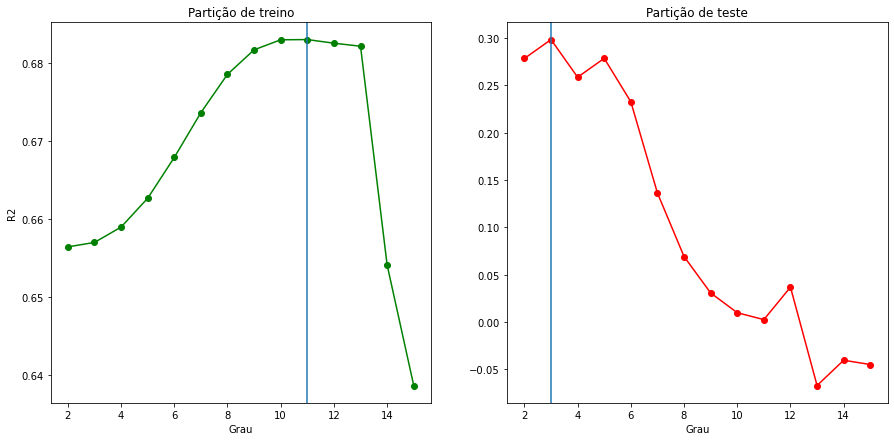

In [133]:
f, axs = plt.subplots(1, 2, sharey=False, figsize=(15,7))

axs[0].plot(df_avaliacao.index, df_avaliacao['Treino'], '-og')
axs[0].axvline(df_avaliacao['Treino'].idxmax())
axs[0].set_title('Partição de treino')
axs[0].set_xlabel('Grau')
axs[0].set_ylabel('R2')
axs[1].plot(df_avaliacao.index, df_avaliacao['Teste'], '-or')
axs[1].axvline(df_avaliacao['Teste'].idxmax())
axs[1].set_title('Partição de teste')
axs[1].set_xlabel('Grau')

plt.show()

---

## Exercício 2

Utilizando o dataset de vendas de abóboras na cidade de Nova Iorque, compare uma regressão linear com regressões polinomiais.

In [117]:
nyc_pumpkins = pd.read_csv("../../dataset/nyc_pumpkins.csv")

In [134]:
nyc_pumpkins.describe()

,size,price
count,104.000000,104.000000
mean,2.134615,170.735577
std,1.576882,110.837236
min,0.000000,23.500000
25%,1.000000,28.750000
50%,3.000000,200.000000
75%,3.250000,245.000000
max,5.000000,430.000000


In [143]:
X = nyc_pumpkins.loc[:,['size']]
y = nyc_pumpkins.loc[:,['price']]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Regressão Linear

In [145]:
regression = LinearRegression().fit(X_train, y_train)

In [146]:
print(f"Partição de Treino: {regression.score(X_train, y_train)}")
y_pred = regression.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.25775331340249175
Partição de Teste: -0.615404746065505


### Regressão Polinomial

In [148]:
X = nyc_pumpkins.loc[:,['size']]

In [153]:
lista_treino = []
lista_teste = []
lista_idx = []
df_avaliacao = pd.DataFrame()

for deg in range(2,8):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)
    regression = LinearRegression().fit(X_train, y_train)
    treino = regression.score(X_train, y_train)
    y_pred = regression.predict(X_test)
    teste = r2_score(y_pred, y_test)
    lista_treino.append(treino)
    lista_teste.append(teste)
    lista_idx.append(deg)
    
df_avaliacao['Grau'] = lista_idx
df_avaliacao.set_index('Grau', inplace=True)
df_avaliacao['Treino'] = lista_treino
df_avaliacao['Teste'] = lista_teste

print(df_avaliacao)

        Treino     Teste
Grau                    
2     0.415218  0.219323
3     0.428875  0.067375
4     0.452734  0.017271
5     0.460535 -0.013007
6     0.460535 -0.013007
7     0.460535 -0.013007


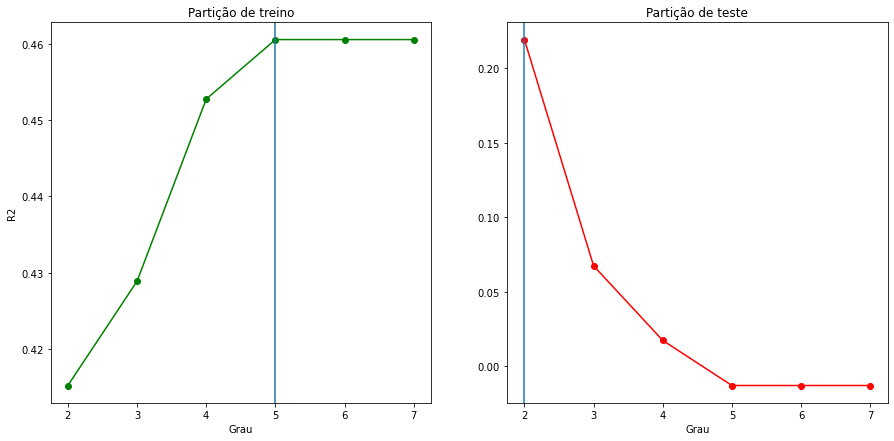

In [154]:
f, axs = plt.subplots(1, 2, sharey=False, figsize=(15,7))

axs[0].plot(df_avaliacao.index, df_avaliacao['Treino'], '-og')
axs[0].axvline(df_avaliacao['Treino'].idxmax())
axs[0].set_title('Partição de treino')
axs[0].set_xlabel('Grau')
axs[0].set_ylabel('R2')
axs[1].plot(df_avaliacao.index, df_avaliacao['Teste'], '-or')
axs[1].axvline(df_avaliacao['Teste'].idxmax())
axs[1].set_title('Partição de teste')
axs[1].set_xlabel('Grau')

plt.show()

**Resposta:**  
A regressão polinomial tem seu resultado melhorado até o grau 5 para apartição de treino. Do sexto grau em diante os valores de R2 são constantes (= 0.460535). Para a partição de teste a regressão polinomial so faz diminuir os valoes de $R^2$.